In [19]:
# import the necessary packages
from matplotlib import pyplot as plt
import numpy as np
import os
import cv2
import pickle

In [18]:
# setting the path to the dataset
DATA_DIR = "./data/PetImages/"
CATEGORIES = ["Dog", "Cat"]

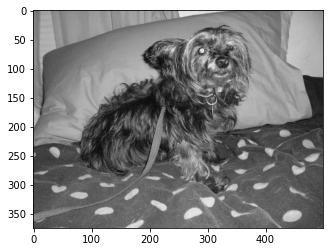

In [3]:
for category in CATEGORIES:  # do dogs and cats
    path = os.path.join(DATA_DIR, category)  # create path to dogs and cats
    for img in os.listdir(path):  # iterate over each image per dogs and cats
        img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)  # convert to array
        plt.imshow(img_array, cmap='gray')  # graph it
        plt.show()  # display!

        break  # we just want one for now so break
    break  #...and one more!

In [4]:
print(img_array.shape)

(375, 500)


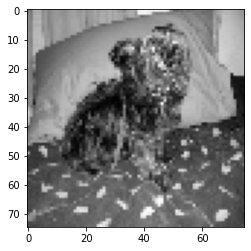

In [5]:
# resizing the images to process them quickly
IMG_SIZE = 75
resized_img = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))

plt.imshow(resized_img, cmap='gray')
plt.show()

In [6]:
# combining above trials and creating the training data
training_data = []

def create_training_data():
    for category in CATEGORIES:  # do dogs and cats
        path = os.path.join(DATA_DIR,category)  # create path to dogs and cats
        class_num = CATEGORIES.index(category)  # get the classification  (0 or a 1). 0=dog 1=cat

        for img in os.listdir(path):  # iterate over each image per dogs and cats
            try:
                img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
                resized_img = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  # resize to normalize data size
                training_data.append([resized_img, class_num])  # add this to our training_data
            except Exception as e:  # in the interest in keeping the output clean...
                print("Images which are corrupted ->", e)
                pass
    return None

create_training_data()

Images which are corrupted -> OpenCV(4.2.0) C:\projects\opencv-python\opencv\modules\imgproc\src\resize.cpp:4045: error: (-215:Assertion failed) !ssize.empty() in function 'cv::resize'

Images which are corrupted -> OpenCV(4.2.0) C:\projects\opencv-python\opencv\modules\imgproc\src\resize.cpp:4045: error: (-215:Assertion failed) !ssize.empty() in function 'cv::resize'

Images which are corrupted -> OpenCV(4.2.0) C:\projects\opencv-python\opencv\modules\imgproc\src\resize.cpp:4045: error: (-215:Assertion failed) !ssize.empty() in function 'cv::resize'

Images which are corrupted -> OpenCV(4.2.0) C:\projects\opencv-python\opencv\modules\imgproc\src\resize.cpp:4045: error: (-215:Assertion failed) !ssize.empty() in function 'cv::resize'

Images which are corrupted -> OpenCV(4.2.0) C:\projects\opencv-python\opencv\modules\imgproc\src\resize.cpp:4045: error: (-215:Assertion failed) !ssize.empty() in function 'cv::resize'

Images which are corrupted -> OpenCV(4.2.0) C:\projects\opencv-python\

In [7]:
print(len(training_data))

24946


In [8]:
# shuffling the data
import random

random.shuffle(training_data)

In [9]:
# checking the data
for sample in training_data[:10]:
    print(sample[1])

0
1
0
0
0
0
0
0
0
1


In [10]:
# separating the features and labels
X = []
y = []

for features, label in training_data:
    X.append(features)
    y.append(label)


In [11]:
# reshaping the features (Needed for CNN in Keras)
X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
# -1 is the number of features
# 1 is the number of channels (1 for grayscale, 3 for RGB)
# 75, 75 is the size of the image (IMG_SIZE, IMG_SIZE)

In [12]:
# saving the data
pickle_out = open("./data/X_dog_cat.pickle", "wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("./data/y_dog_cat.pickle", "wb")
pickle.dump(y, pickle_out)
pickle_out.close()

In [5]:
# loading the data
pickle_in = open("./data/X_dog_cat.pickle", "rb")
X = pickle.load(pickle_in)

pickle_in = open("./data/y_dog_cat.pickle", "rb")
y = pickle.load(pickle_in)

In [14]:
# checking the loaded data
for sample in y[:10]:
    print(sample)

0
1
0
0
0
0
0
0
0
1


In [6]:
# normalising the data
X = X / 255.0
print (X[0])

[[[0.05882353]
  [0.04705882]
  [0.03921569]
  ...
  [0.04313725]
  [0.04313725]
  [0.03137255]]

 [[0.03529412]
  [0.02352941]
  [0.01960784]
  ...
  [0.05490196]
  [0.0627451 ]
  [0.04313725]]

 [[0.02352941]
  [0.01960784]
  [0.01176471]
  ...
  [0.05882353]
  [0.05490196]
  [0.05490196]]

 ...

 [[0.01960784]
  [0.03529412]
  [0.02352941]
  ...
  [0.0627451 ]
  [0.0627451 ]
  [0.0627451 ]]

 [[0.01568627]
  [0.02352941]
  [0.02352941]
  ...
  [0.0627451 ]
  [0.05490196]
  [0.05098039]]

 [[0.01176471]
  [0.02352941]
  [0.02745098]
  ...
  [0.05490196]
  [0.05490196]
  [0.0627451 ]]]


In [7]:
# Enabling TensorFlow version 1 behavior
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

Instructions for updating:
non-resource variables are not supported in the long term


In [15]:
# importing KERAS packages for model building
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import TensorBoard
import time

# for finding the best optimized model using TensorBoard
dense_layers = [0, 1, 2]
layer_sizes = [32, 64, 128]
conv_layers = [1, 2, 3]

In [16]:
# building CNN model
for dense_layer in dense_layers:
    for layer_size in layer_sizes:
        for conv_layer in conv_layers:
            NAME = "Pet_classifier_{}-conv-{}-nodes-{}-dense-{}".format(conv_layer, layer_size, dense_layer, int(time.time()))
            tensorboard = TensorBoard(log_dir='logs/pet_classification/{}'.format(NAME))
            model = tf.keras.models.Sequential()

            # input layer (convolutional layer)
            model.add(tf.keras.layers.Conv2D(layer_size,
                                             (3, 3),
                                             input_shape=X.shape[1:]))  # shape(1:),bcoz ignore-1 from that reshaping & consider only image shape
            model.add(tf.keras.layers.Activation('relu'))
            model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))

            # hidden layers (convolutional layers)
            for l in range(conv_layers[0]-1):
                model.add(tf.keras.layers.Conv2D(layer_size, (3, 3)))
                model.add(tf.keras.layers.Activation('relu'))
                model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))

            # Flattening the data for input to Dense layers
            model.add(tf.keras.layers.Flatten())  # this converts our 3D feature maps to 1D feature vectors

            for l in range(dense_layer):
                model.add(tf.keras.layers.Dense(layer_size))
                model.add(tf.keras.layers.Activation('relu'))
                model.add(tf.keras.layers.Dropout(0.2))
                # Dropout is a regularization technique for reducing overfitting in neural networks
                # by preventing complex co-adaptations on training data.
                # It helps to reduce overfitting, when a neural network learns or memorizes the training data
                # instead of learning the true pattern.

            # output layer (dense layer) Classification
            model.add(tf.keras.layers.Dense(1))
            model.add(tf.keras.layers.Activation('sigmoid'))

            model.compile(loss='binary_crossentropy',
                          optimizer='adam',
                          metrics=['accuracy'])
            # binary_crossentropy bcoz only 2 classification needed otherwise use categorical_crossentropy

            model.fit(X, y,
                      batch_size=32,
                      epochs=10,
                      validation_split=0.2,
                      callbacks=[tensorboard])

Train on 19956 samples, validate on 4990 samples
Epoch 1/10
19956/19956 [==============================] - ETA: 0s - loss: 0.6434 - acc: 0.6210

D:\Anaconda3\lib\site-packages\keras\engine\training_v1.py:2332: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates = self.state_updates


19956/19956 [==============================] - 13s 638us/sample - loss: 0.6434 - acc: 0.6210 - val_loss: 0.5867 - val_acc: 0.6848
Epoch 2/10
19956/19956 [==============================] - 9s 449us/sample - loss: 0.5324 - acc: 0.7365 - val_loss: 0.4749 - val_acc: 0.7752
Epoch 3/10
19956/19956 [==============================] - 9s 452us/sample - loss: 0.4604 - acc: 0.7840 - val_loss: 0.4406 - val_acc: 0.7916
Epoch 4/10
19956/19956 [==============================] - 9s 455us/sample - loss: 0.4119 - acc: 0.8119 - val_loss: 0.4155 - val_acc: 0.8120
Epoch 5/10
19956/19956 [==============================] - 9s 451us/sample - loss: 0.3708 - acc: 0.8347 - val_loss: 0.3762 - val_acc: 0.8345
Epoch 6/10
19956/19956 [==============================] - 9s 452us/sample - loss: 0.3382 - acc: 0.8498 - val_loss: 0.3803 - val_acc: 0.8271
Epoch 7/10
19956/19956 [==============================] - 9s 451us/sample - loss: 0.3057 - acc: 0.8680 - val_loss: 0.3798 - val_acc: 0.8361
Epoch 8/10
19956/19956 [======

In [11]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 73, 73, 64)        640       
                                                                 
 activation_12 (Activation)  (None, 73, 73, 64)        0         
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 34, 34, 64)        36928     
                                                                 
 activation_13 (Activation)  (None, 34, 34, 64)        0         
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 17, 17, 64)       0         
 2D)                                                  

In [17]:
# saving the model
model.save('./models/dog_cat_classifier_final.model')

***
---
### Analyzing and optimizing the model with TensorBoard

![TensorBoard](./data/PetImages/analysis_2_graphs.png)

***
### Predicting the model
---

In [20]:
# loading the model
model = tf.keras.models.load_model('./models/dog_cat_classifier_final.model')

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


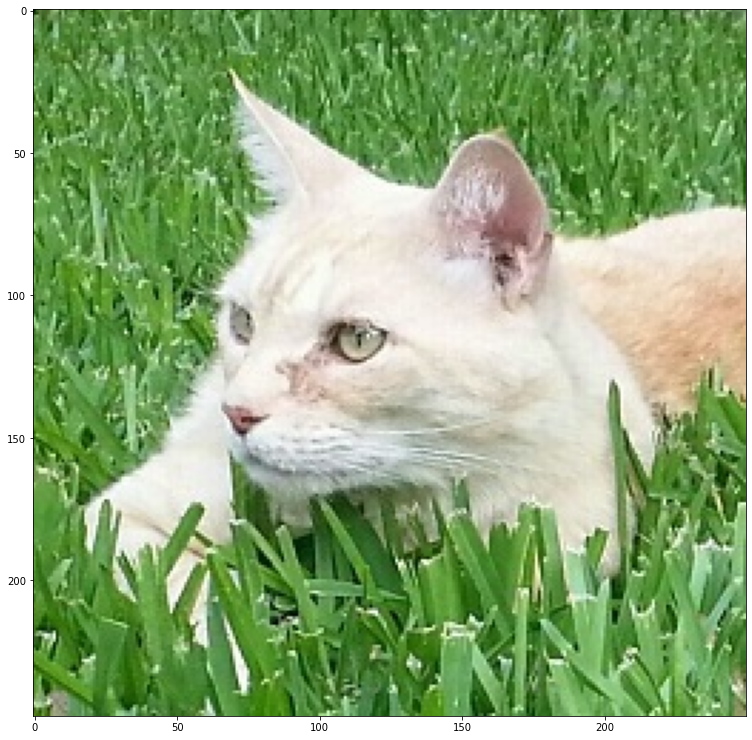

Prediction: The above image is of ->  Cat


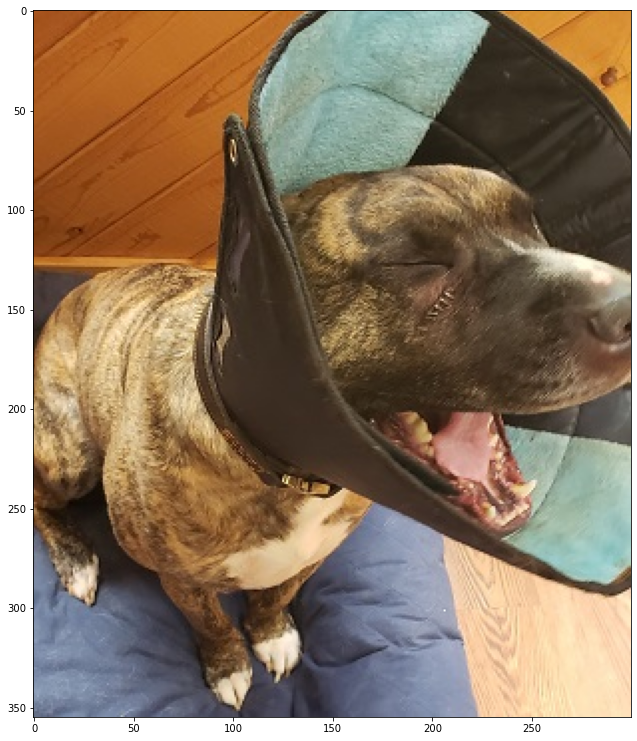

Prediction: The above image is of ->  Dog


In [31]:
# reading the images for prediction and predicting them
IMG_SIZE = 75
path = os.path.join(DATA_DIR, 'test_images')  # create path to test data
for img in os.listdir(path):  # iterate over each image per dogs and cats
    img = cv2.imread(os.path.join(path,img), cv2.IMREAD_COLOR)  # convert to array
    img_array = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    resized_img = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  # resize to normalize data size
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.figure(figsize=(13, 13))
    plt.imshow(img)  # graph it
    plt.show()  # display!
    prediction = model.predict([resized_img.reshape(-1, IMG_SIZE, IMG_SIZE, 1)])  # make prediction
    print("Prediction: The above image is of -> ", CATEGORIES[int(prediction[0][0])])